# Importing the dependencies

In [282]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load the cleaned dataset

In [283]:
data = pd.read_csv('./datasets/cleaned_twitter_training.csv')

In [284]:
data.head()

,Unnamed: 0,context,sentiment,text,cleaned_text
0,0,Borderlands,1,im getting on borderlands and i will murder yo...,get borderland murder
1,1,Borderlands,1,I am coming to the borders and I will kill you...,come border kill
2,2,Borderlands,1,im getting on borderlands and i will kill you ...,get borderland kill
3,3,Borderlands,1,im coming on borderlands and i will murder you...,come borderland murder
4,6,Borderlands,1,So I spent a few hours making something for fu...,spent hour make someth fun know huge borderlan...


In [285]:
data = data.drop(['Unnamed: 0'], axis=1)

In [286]:
X_train, X_test, y_train, y_test = train_test_split(
    data['text'], data['sentiment'], stratify=data['sentiment']) # test 25%, train 75%

In [287]:
X_train

5654     @NBA2K_MyTEAM @ItsShake4ndbake @oThasideLando ...
15069    i was playin fortnite creative fill an out of ...
491      Some Y ’ all just stick with a Mario Kart and ...
16171                                        Ok, that's a.
13869    ... League of Legends is having ratings issues...
                               ...                        
13336           @PlayApex SHOW BANGALORE SOME LOVE!!!!!!!!
4505     Holy shit, it only took 2 console generations ...
10019    Received a great honor today. Received a charg...
5619     J 4 cards in 6 days... still no city jerseys R...
30957                    @HollieB You have to eat this GPU
Name: text, Length: 25589, dtype: object

In [288]:
y_train

5654     0
15069    0
491      1
16171    1
13869    0
        ..
13336    1
4505     1
10019    1
5619     0
30957    1
Name: sentiment, Length: 25589, dtype: int64

In [289]:
# Hyperparameters
VOCAB_SIZE = 1000
EMBEDDING_DIM = 16
MAX_LENGTH = 20
TRUNCATING_TYPE='post'
PADDING_TYPE='post'
OOV_TOKEN = "<OOV>"

In [290]:
# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(X_train)

In [291]:
def preprocess_texts(texts: list[str]):
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=MAX_LENGTH, padding=PADDING_TYPE, truncating=TRUNCATING_TYPE)
    return padded_sequences

# Constructing the model

In [292]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH, name='embedding'),
        tf.keras.layers.Flatten(name='flatten'),
        tf.keras.layers.Dense(6, activation='relu', name='dense_relu'),
        tf.keras.layers.Dense(1, activation='sigmoid', name='dense_sigmoid'),
    ])
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    return model

In [293]:
# Define neural networks
experimenting_model = create_model()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            16000     
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense_relu (Dense)          (None, 6)                 1926      
                                                                 
 dense_sigmoid (Dense)       (None, 1)                 7         
                                                                 
Total params: 17,933
Trainable params: 17,933
Non-trainable params: 0
_________________________________________________________________


In [294]:
preprocessed_X_train = preprocess_texts(X_train)

In [295]:
EPOCHS = 15
y_train = np.array(y_train)
experimenting_model.fit(preprocessed_X_train, y_train, epochs=EPOCHS, verbose=2)

Epoch 1/15
800/800 - 2s - loss: 0.5107 - accuracy: 0.7445 - 2s/epoch - 3ms/step
Epoch 2/15
800/800 - 2s - loss: 0.3417 - accuracy: 0.8502 - 2s/epoch - 2ms/step
Epoch 3/15
800/800 - 2s - loss: 0.2700 - accuracy: 0.8880 - 2s/epoch - 2ms/step
Epoch 4/15
800/800 - 2s - loss: 0.2187 - accuracy: 0.9124 - 2s/epoch - 2ms/step
Epoch 5/15
800/800 - 2s - loss: 0.1799 - accuracy: 0.9293 - 2s/epoch - 2ms/step
Epoch 6/15
800/800 - 2s - loss: 0.1501 - accuracy: 0.9416 - 2s/epoch - 2ms/step
Epoch 7/15
800/800 - 2s - loss: 0.1257 - accuracy: 0.9523 - 2s/epoch - 2ms/step
Epoch 8/15
800/800 - 2s - loss: 0.1080 - accuracy: 0.9593 - 2s/epoch - 2ms/step
Epoch 9/15
800/800 - 2s - loss: 0.0926 - accuracy: 0.9659 - 2s/epoch - 2ms/step
Epoch 10/15
800/800 - 2s - loss: 0.0805 - accuracy: 0.9695 - 2s/epoch - 2ms/step
Epoch 11/15
800/800 - 2s - loss: 0.0713 - accuracy: 0.9727 - 2s/epoch - 2ms/step
Epoch 12/15
800/800 - 2s - loss: 0.0643 - accuracy: 0.9749 - 2s/epoch - 2ms/step
Epoch 13/15
800/800 - 2s - loss: 0.05

In [296]:
def classify_text(model, text: str):
    preprocessed_text = preprocess_texts([text]) # Pre-processed texts must be a list for the model to consume
    prediction = model.predict(preprocessed_text)
    print(prediction)
    
    return "Positive" if prediction >= .5 else "Negative"


In [297]:
test_text = "Holy shit!"
classify_text(experimenting_model, test_text)

1/1 [==============================] - 0s 90ms/step
[[0.04035816]]


'Negative'

In [298]:
X_test

16340    Just want to use the phone... Microsoft Teams ...
1717     NEW VIDEO: THE UNDERRATED SCAR CLASS. . youtu....
5509                 RT Where would he go? GOAT Larry Bird
762      @Ki11ersix @dammit2h3ll @Borderlands Consideri...
11839    @ DionDoes have u played Assassins Creed 3? Li...
                               ...                        
22953                      I thought this was FIFA 20. Wow
5164     Dog I can't get on 2K soundtrack? That shit tr...
17029    Hey, just gentle reminder that if you've not p...
7345     Too busy people play dota 2, and internet goes...
31178    Happy birthday to Johnny Silverhand himself......
Name: text, Length: 8530, dtype: object

In [299]:
preprocessed_X_test = preprocess_texts(X_test)
preprocessed_X_test

array([[ 24, 124,   4, ...,   0,   0,   0],
       [ 55, 244,   2, ...,   0,   0,   0],
       [  1, 256, 123, ...,   0,   0,   0],
       ...,
       [284,  24,   1, ...,   4,  32,   6],
       [156,   1,  77, ...,   0,   0,   0],
       [206, 768,   4, ...,   1,   1,   0]])

In [300]:
experimenting_model.evaluate(preprocessed_X_test, y_test)

267/267 [==============================] - 1s 2ms/step - loss: 0.7677 - accuracy: 0.8376


[0.7676817178726196, 0.83763188123703]

In [301]:
y_preds = experimenting_model.predict(preprocessed_X_test)
y_preds = y_preds.flatten()
y_preds = np.where(y_preds > .5, 1, 0)

267/267 [==============================] - 1s 2ms/step


In [302]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4566
           1       0.83      0.82      0.82      3964

    accuracy                           0.84      8530
   macro avg       0.84      0.84      0.84      8530
weighted avg       0.84      0.84      0.84      8530



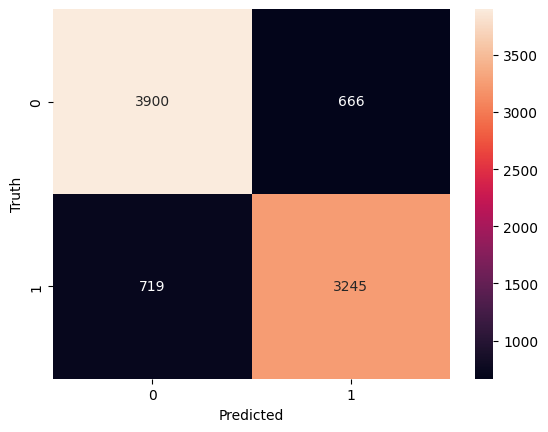

In [303]:
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Constructing The 'ready-to-use' Model

In [304]:
model = create_model()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            16000     
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense_relu (Dense)          (None, 6)                 1926      
                                                                 
 dense_sigmoid (Dense)       (None, 1)                 7         
                                                                 
Total params: 17,933
Trainable params: 17,933
Non-trainable params: 0
_________________________________________________________________


In [305]:
preprocessed_X = preprocess_texts(data['text'])
y = data['sentiment'].to_numpy()

In [306]:
model.fit(preprocessed_X, y, epochs=EPOCHS, verbose=2)

Epoch 1/15
1067/1067 - 3s - loss: 0.4819 - accuracy: 0.7590 - 3s/epoch - 3ms/step
Epoch 2/15
1067/1067 - 2s - loss: 0.3337 - accuracy: 0.8543 - 2s/epoch - 2ms/step
Epoch 3/15
1067/1067 - 2s - loss: 0.2713 - accuracy: 0.8865 - 2s/epoch - 2ms/step
Epoch 4/15
1067/1067 - 2s - loss: 0.2247 - accuracy: 0.9082 - 2s/epoch - 2ms/step
Epoch 5/15
1067/1067 - 2s - loss: 0.1916 - accuracy: 0.9239 - 2s/epoch - 2ms/step
Epoch 6/15
1067/1067 - 1s - loss: 0.1656 - accuracy: 0.9358 - 1s/epoch - 1ms/step
Epoch 7/15
1067/1067 - 2s - loss: 0.1441 - accuracy: 0.9433 - 2s/epoch - 2ms/step
Epoch 8/15
1067/1067 - 2s - loss: 0.1282 - accuracy: 0.9499 - 2s/epoch - 2ms/step
Epoch 9/15
1067/1067 - 2s - loss: 0.1143 - accuracy: 0.9557 - 2s/epoch - 1ms/step
Epoch 10/15
1067/1067 - 2s - loss: 0.1020 - accuracy: 0.9599 - 2s/epoch - 2ms/step
Epoch 11/15
1067/1067 - 2s - loss: 0.0933 - accuracy: 0.9634 - 2s/epoch - 1ms/step
Epoch 12/15
1067/1067 - 2s - loss: 0.0854 - accuracy: 0.9661 - 2s/epoch - 2ms/step
Epoch 13/15
1

In [307]:
model.save('./models/yapping_classifier_model')

INFO:tensorflow:Assets written to: ./models/yapping_classifier_model\assets


In [308]:
with open('./models/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)